In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
from sklearn.preprocessing import MaxAbsScaler

In [40]:
data = pd.read_csv('student-mat.csv')

In [5]:
print(data.head)

<bound method NDFrame.head of     school gender  age address famsize Pstatus  Medu  Fedu      Mjob  \
0       GP      F   18       U     GT3       A     4     4   at_home   
1       GP      F   17       U     GT3       T     1     1   at_home   
2       GP      F   15       U     LE3       T     1     1   at_home   
3       GP      F   15       U     GT3       T     4     2    health   
4       GP      F   16       U     GT3       T     3     3     other   
..     ...    ...  ...     ...     ...     ...   ...   ...       ...   
390     MS      M   20       U     LE3       A     2     2  services   
391     MS      M   17       U     LE3       T     3     1  services   
392     MS      M   21       R     GT3       T     1     1     other   
393     MS      M   18       R     LE3       T     3     2  services   
394     MS      M   19       U     LE3       T     1     1     other   

         Fjob  ... higher internet  romantic  famrel  freetime goout health  \
0     teacher  ...    yes 

IndexError: index 5 is out of bounds for axis 0 with size 5

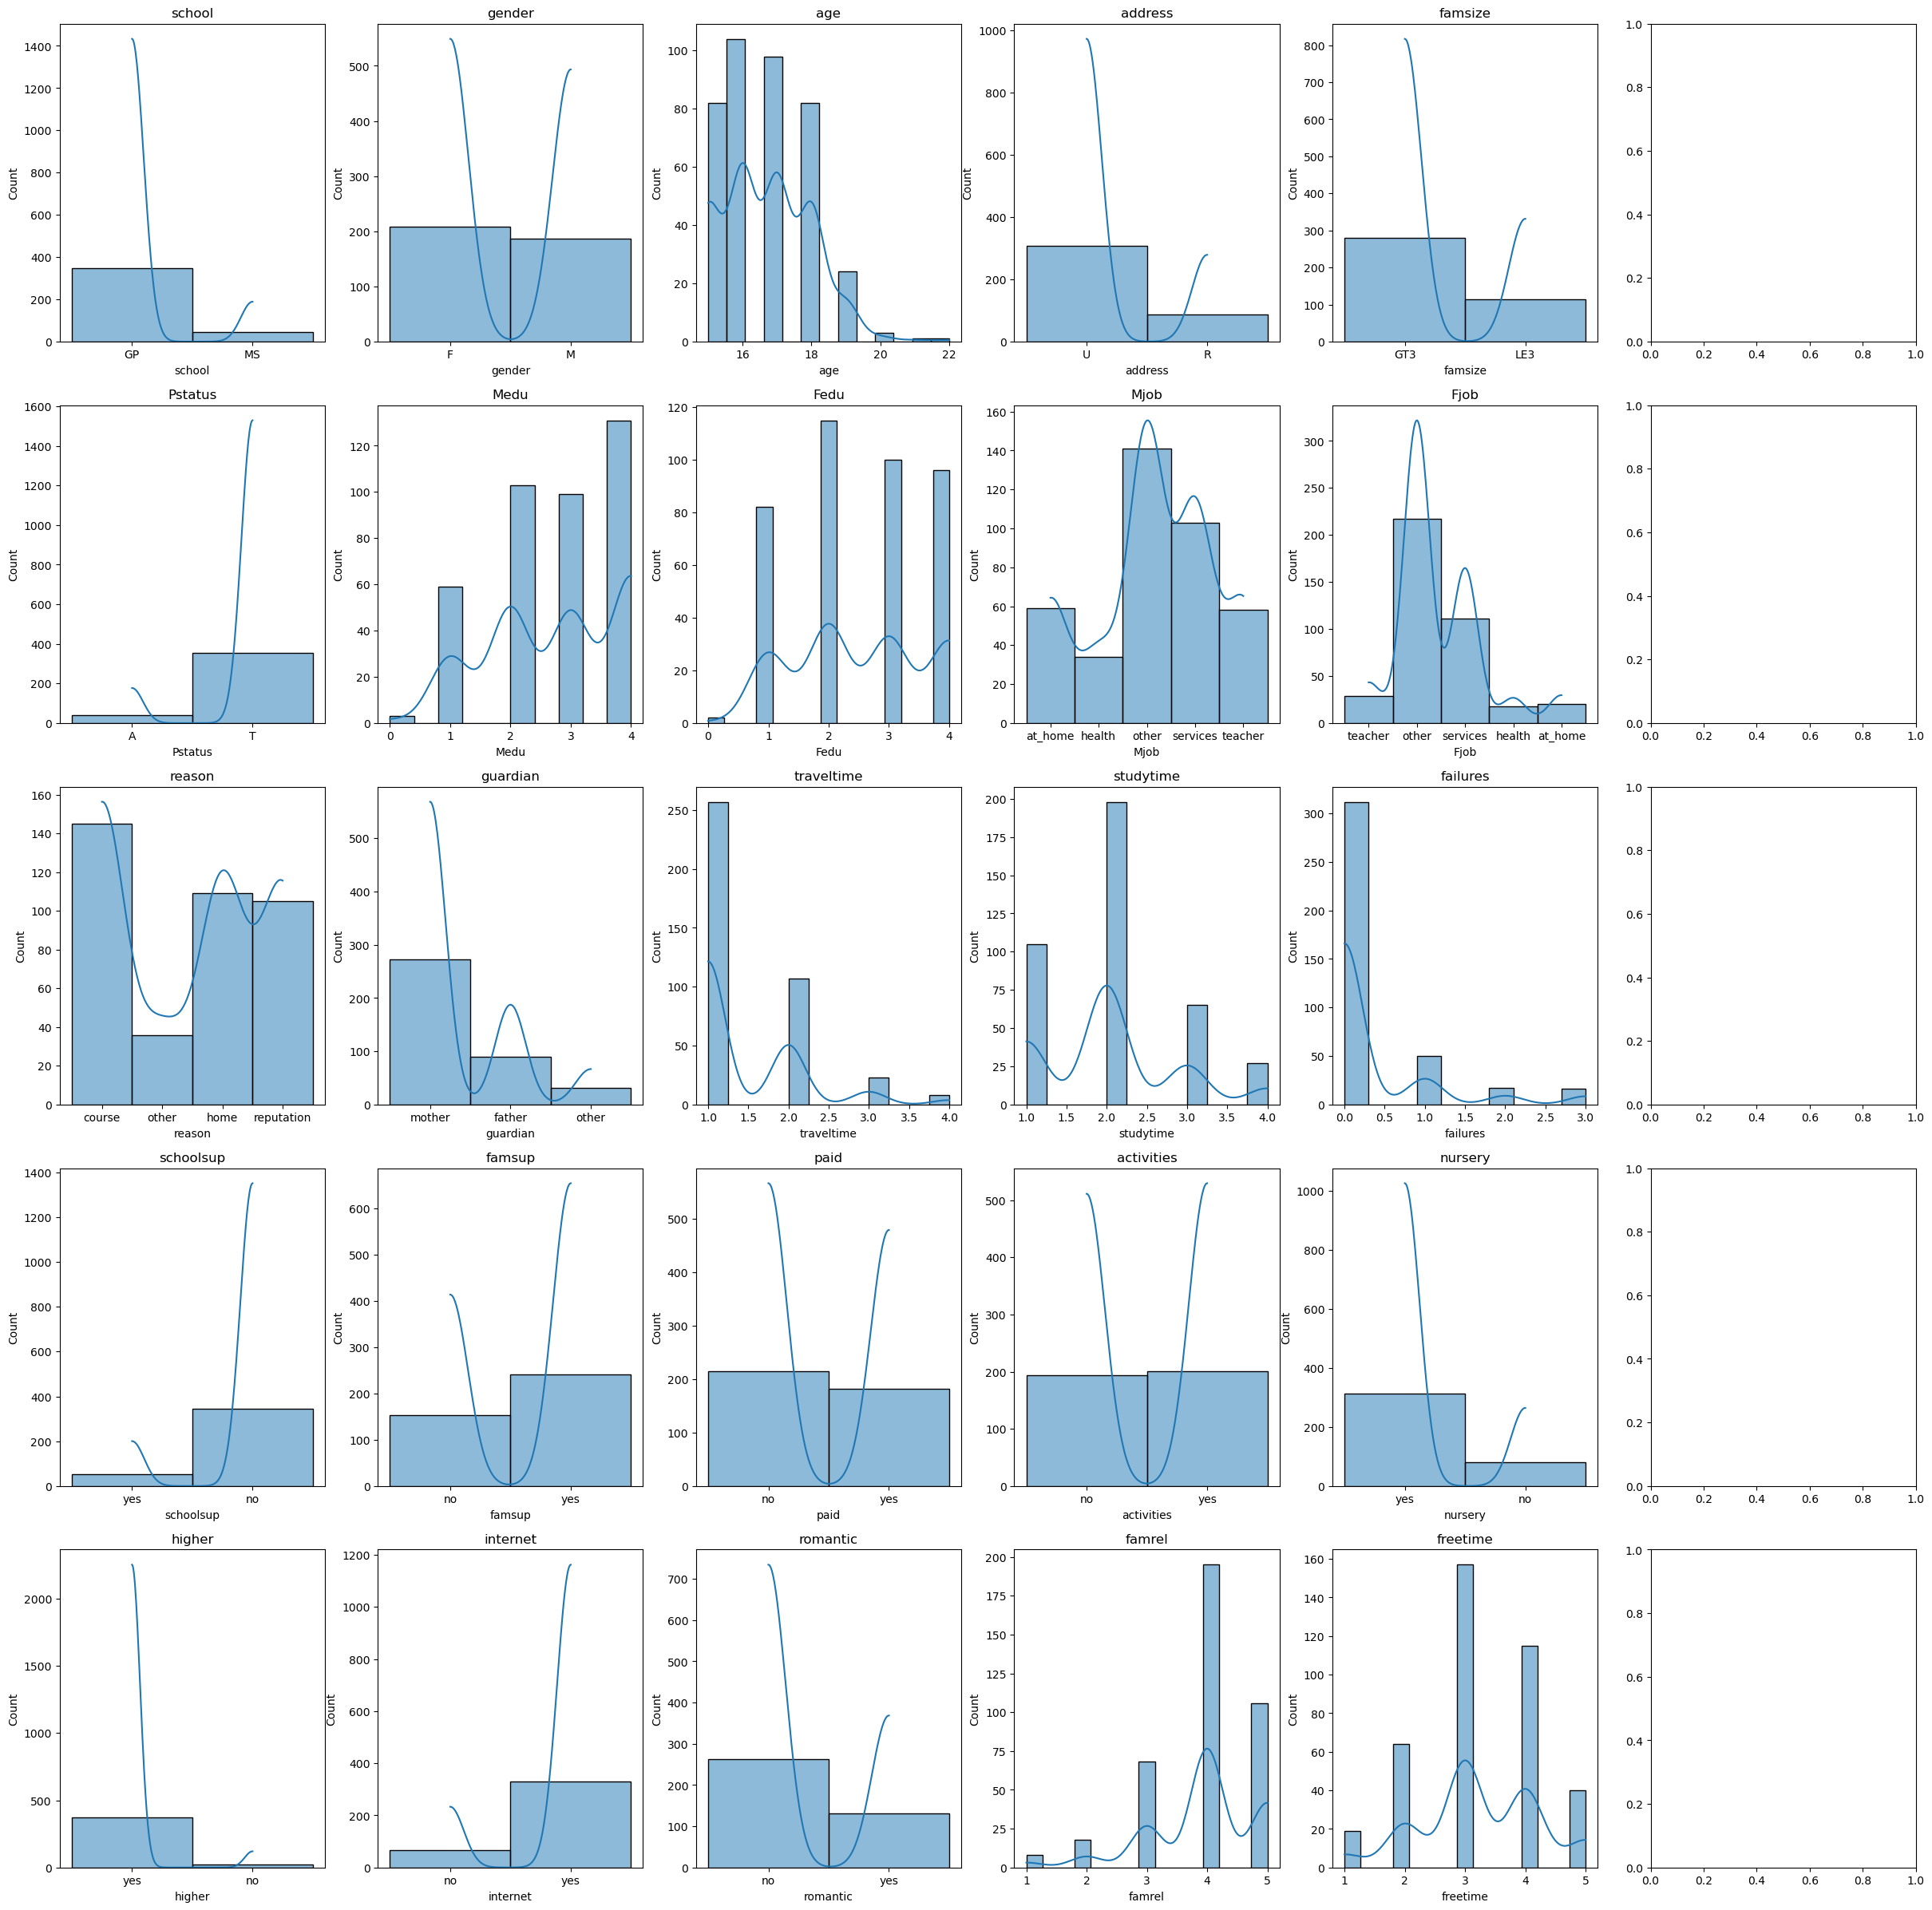

In [6]:
df = data
fig, axes = plt.subplots(5, len(df.columns)//5, figsize=(30, 30))

# Цикл для построения графиков
for i, column in enumerate(df.columns):
    sns.histplot(data=df[column], ax=axes[i//5, i%5], kde=True)
    axes[i//5, i%5].set_title(column)

# Настройка отображения
plt.tight_layout()

# Отображение графиков
plt.show()

In [7]:
# Анализ данных и подготовка факторов
# выбросов во всех данных не обнаружено
# School GP = 0, MS = 1
data['school'] = data['school'].replace('GP', 0)
data['school'] = data['school'].replace('MS', 1)

# Гендер F = 0, M = 0
data['gender'] = data['gender'].replace('F', 0)
data['gender'] = data['gender'].replace('M', 1)

# age выбросов не обнаружено

# address U = 1, R = 0
data['address'] = data['address'].replace('R', 0)
data['address'] = data['address'].replace('U', 1)

# famsize LE3 = 0, GT3 = 1
data['famsize'] = data['famsize'].replace('LE3', 0)
data['famsize'] = data['famsize'].replace('GT3', 1)

# Pstatus T = 1, A = 0
data['Pstatus'] = data['Pstatus'].replace('A', 0)
data['Pstatus'] = data['Pstatus'].replace('T', 1)

# Medu: OK
# Fedu: OK

# Mjob — работа матери (категориальный: teacher — 4, health — 2, services — 1, at_home — 3 или other — 0).
data['Mjob'].replace({'teacher':4, 'health' : 2, 'services' : 1, 'at_home' : 3, 'other' : 0}, inplace = True)
# Fjob — работа отца (teacher — 4, health — 2, services — 1, at_home — 3 или other — 0).
data['Fjob'].replace({'teacher':4, 'health' : 2, 'services' : 1, 'at_home' : 3, 'other' : 0}, inplace = True)
                     
# reason — причина выбора этой школы (категориальный: home — «близко к дому», reputation — «репутация школы», course — 4 или other — «другое»).
data['reason'].replace({'home':3, 'reputation' : 2, 'course' : 1, 'other' : 0}, inplace = True)            
# guardian — попечитель ученика (категориальный: mother — 1, father — 2 или other — 0).
data['guardian'].replace({'mother':1, 'father' : 2, 'other' : 0}, inplace = True)                        
# traveltime OK                    
# studytime OK
# failures OK
# schoolsup — дополнительная образовательная поддержка (бинарный: yes — 1 или no — 0).
data['schoolsup'].replace({'yes' : 1, 'no' : 0}, inplace = True)
# famsup — дополнительная семейная поддержка (бинарный: yes — 1 или no — 0).
data['famsup'].replace({'yes' : 1, 'no' : 0}, inplace = True)
# paid — дополнительные занятия по предмету (бинарный: yes — да или no — нет).
data['paid'].replace({'yes' : 1, 'no' : 0}, inplace = True)
#activities — внеучебная деятельность (бинарный: yes — да или no — нет).
data['activities'].replace({'yes' : 1, 'no' : 0}, inplace = True)
#nursery — ходил в подготовительную школу (бинарный: yes — да или no — нет).
data['nursery'].replace({'yes' : 1, 'no' : 0}, inplace = True)
#higher — планирует получать высшее образование (бинарный: yes — да или no — нет).
data['higher'].replace({'yes' : 1, 'no' : 0}, inplace = True)
#internet — есть доступ к интернету дома (бинарный: yes — да или no — нет).
data['internet'].replace({'yes' : 1, 'no' : 0}, inplace = True)
#romantic — есть вторая половинка (бинарный: yes — да или no — нет).
data['romantic'].replace({'yes' : 1, 'no' : 0}, inplace = True)
# OK
# OK
print(data.head())

   school  gender  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0       0       0   18        1        1        0     4     4     3     4   
1       0       0   17        1        1        1     1     1     3     0   
2       0       0   15        1        0        1     1     1     3     0   
3       0       0   15        1        1        1     4     2     2     1   
4       0       0   16        1        1        1     3     3     0     0   

   ...  higher  internet  romantic  famrel  freetime  goout  health  absences  \
0  ...       1         0         0       4         3      4       3         6   
1  ...       1         1         0       5         3      3       3         4   
2  ...       1         1         0       4         3      2       3        10   
3  ...       1         1         1       3         2      2       5         2   
4  ...       1         0         0       4         3      2       5         4   

   G1  G3  
0   5   6  
1   5   6  
2   7  10  
3 

In [8]:
# Разделение на факторы и ответ
x = data.drop('G3', axis = 1)
y = data['G3']
Y = data['G3'].to_numpy()
X = data.drop('G3', axis = 1).to_numpy()

In [9]:
# training model non-normolized non optimisation methods
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 50, random_state = 0)
model = LinearRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)
mse = mean_squared_error(y_test, predict)
score = model.score(x_test, y_test)
print(mse, score)

8.175760039836995 0.690237025648756


In [10]:
# model interpritation
factors = x.columns
coef = model.coef_
intercept = model.intercept_

interpretation_df = pd.DataFrame({
    'Factor': factors,
    'Coefficient': coef
})

# Добавление строки с интерцептом (свободным членом)
intercept_row = pd.DataFrame([['Intercept', intercept]], columns=['Factor', 'Coefficient'])
interpretation_df = pd.concat([intercept_row, interpretation_df], ignore_index=True)
print(interpretation_df)

        Factor  Coefficient
0    Intercept     4.063079
1       school     0.995529
2       gender     0.411350
3          age    -0.336752
4      address     0.491256
5      famsize    -0.144703
6      Pstatus    -0.316170
7         Medu     0.294524
8         Fedu    -0.234324
9         Mjob    -0.129149
10        Fjob    -0.184810
11      reason    -0.213529
12    guardian     0.045086
13  traveltime    -0.482463
14   studytime    -0.167627
15    failures    -0.228146
16   schoolsup     1.109492
17      famsup     0.252471
18        paid     0.595107
19  activities    -0.262399
20     nursery    -0.252058
21      higher     0.225964
22    internet     0.198424
23    romantic    -0.827192
24      famrel     0.183229
25    freetime    -0.085651
26       goout     0.006802
27      health     0.024736
28    absences     0.057206
29          G1     1.098888


In [11]:
# k - Fold method non-normolized
weights = []
best_score = -10000000
mse = 0
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 50)
    model = LinearRegression()
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    if score > best_score:
        best_score = score
        weights = model.coef_
        best_model = model
        predict = model.predict(x_test)
        mse = mean_squared_error(y_test, predict)

print(mse, best_score)
print(weights)

3.7887843588837615 0.8102761963503374
[ 0.81469435  0.36766485 -0.35912192  0.33161755 -0.39560192 -0.49182064
  0.27814877 -0.18704767 -0.2059612  -0.19895861 -0.21646548  0.09551889
 -0.20988116 -0.14574249 -0.25679131  0.9858085   0.2336156   0.6381703
 -0.28259156 -0.31693885 -0.23067676  0.14334109 -0.78671485  0.14342573
 -0.05921808 -0.01460383  0.03441402  0.06007487  1.09969822]


In [32]:
# model interpritation
factors = x.columns
coef = model.coef_
intercept = model.intercept_

interpretation_df = pd.DataFrame({
    'Factor': factors,
    'Coefficient': coef
})

# Добавление строки с интерцептом (свободным членом)
intercept_row = pd.DataFrame([['Intercept', intercept]], columns=['Factor', 'Coefficient'])
interpretation_df = pd.concat([intercept_row, interpretation_df], ignore_index=True)
interpretation_df = interpretation_df.sort_values('Coefficient')
print(interpretation_df)

        Factor  Coefficient
23    romantic    -0.930028
19  activities    -0.400093
8         Fedu    -0.320080
3          age    -0.309433
11      reason    -0.255681
15    failures    -0.243683
13  traveltime    -0.218135
5      famsize    -0.205945
9         Mjob    -0.181605
14   studytime    -0.175476
10        Fjob    -0.159173
6      Pstatus    -0.133331
26       goout    -0.017781
21      higher     0.002879
22    internet     0.019913
27      health     0.024784
25    freetime     0.036435
17      famsup     0.052825
28    absences     0.060799
20     nursery     0.068406
24      famrel     0.123257
12    guardian     0.137414
4      address     0.278311
7         Medu     0.316302
2       gender     0.418511
1       school     0.750822
18        paid     0.868841
16   schoolsup     0.908919
29          G1     1.108223
0    Intercept     3.494599


In [43]:
# Попытаемся оптимизировать факторы(убрать ненужные например) и тренирум модель методом k-Fold
data_crop = data
data_crop = data_crop.drop('gender', axis = 1)
data_crop = data_crop.drop('romantic', axis = 1)
data_crop = data_crop.drop('address', axis = 1)
data_crop = data_crop.drop('famsize', axis = 1)
data_crop = data_crop.drop('Pstatus', axis = 1)
data_crop = data_crop.drop('guardian', axis = 1)
data_crop = data_crop.drop('famrel', axis = 1)
data_crop = data_crop.drop('goout', axis = 1)

IndexError: index 4 is out of bounds for axis 1 with size 4

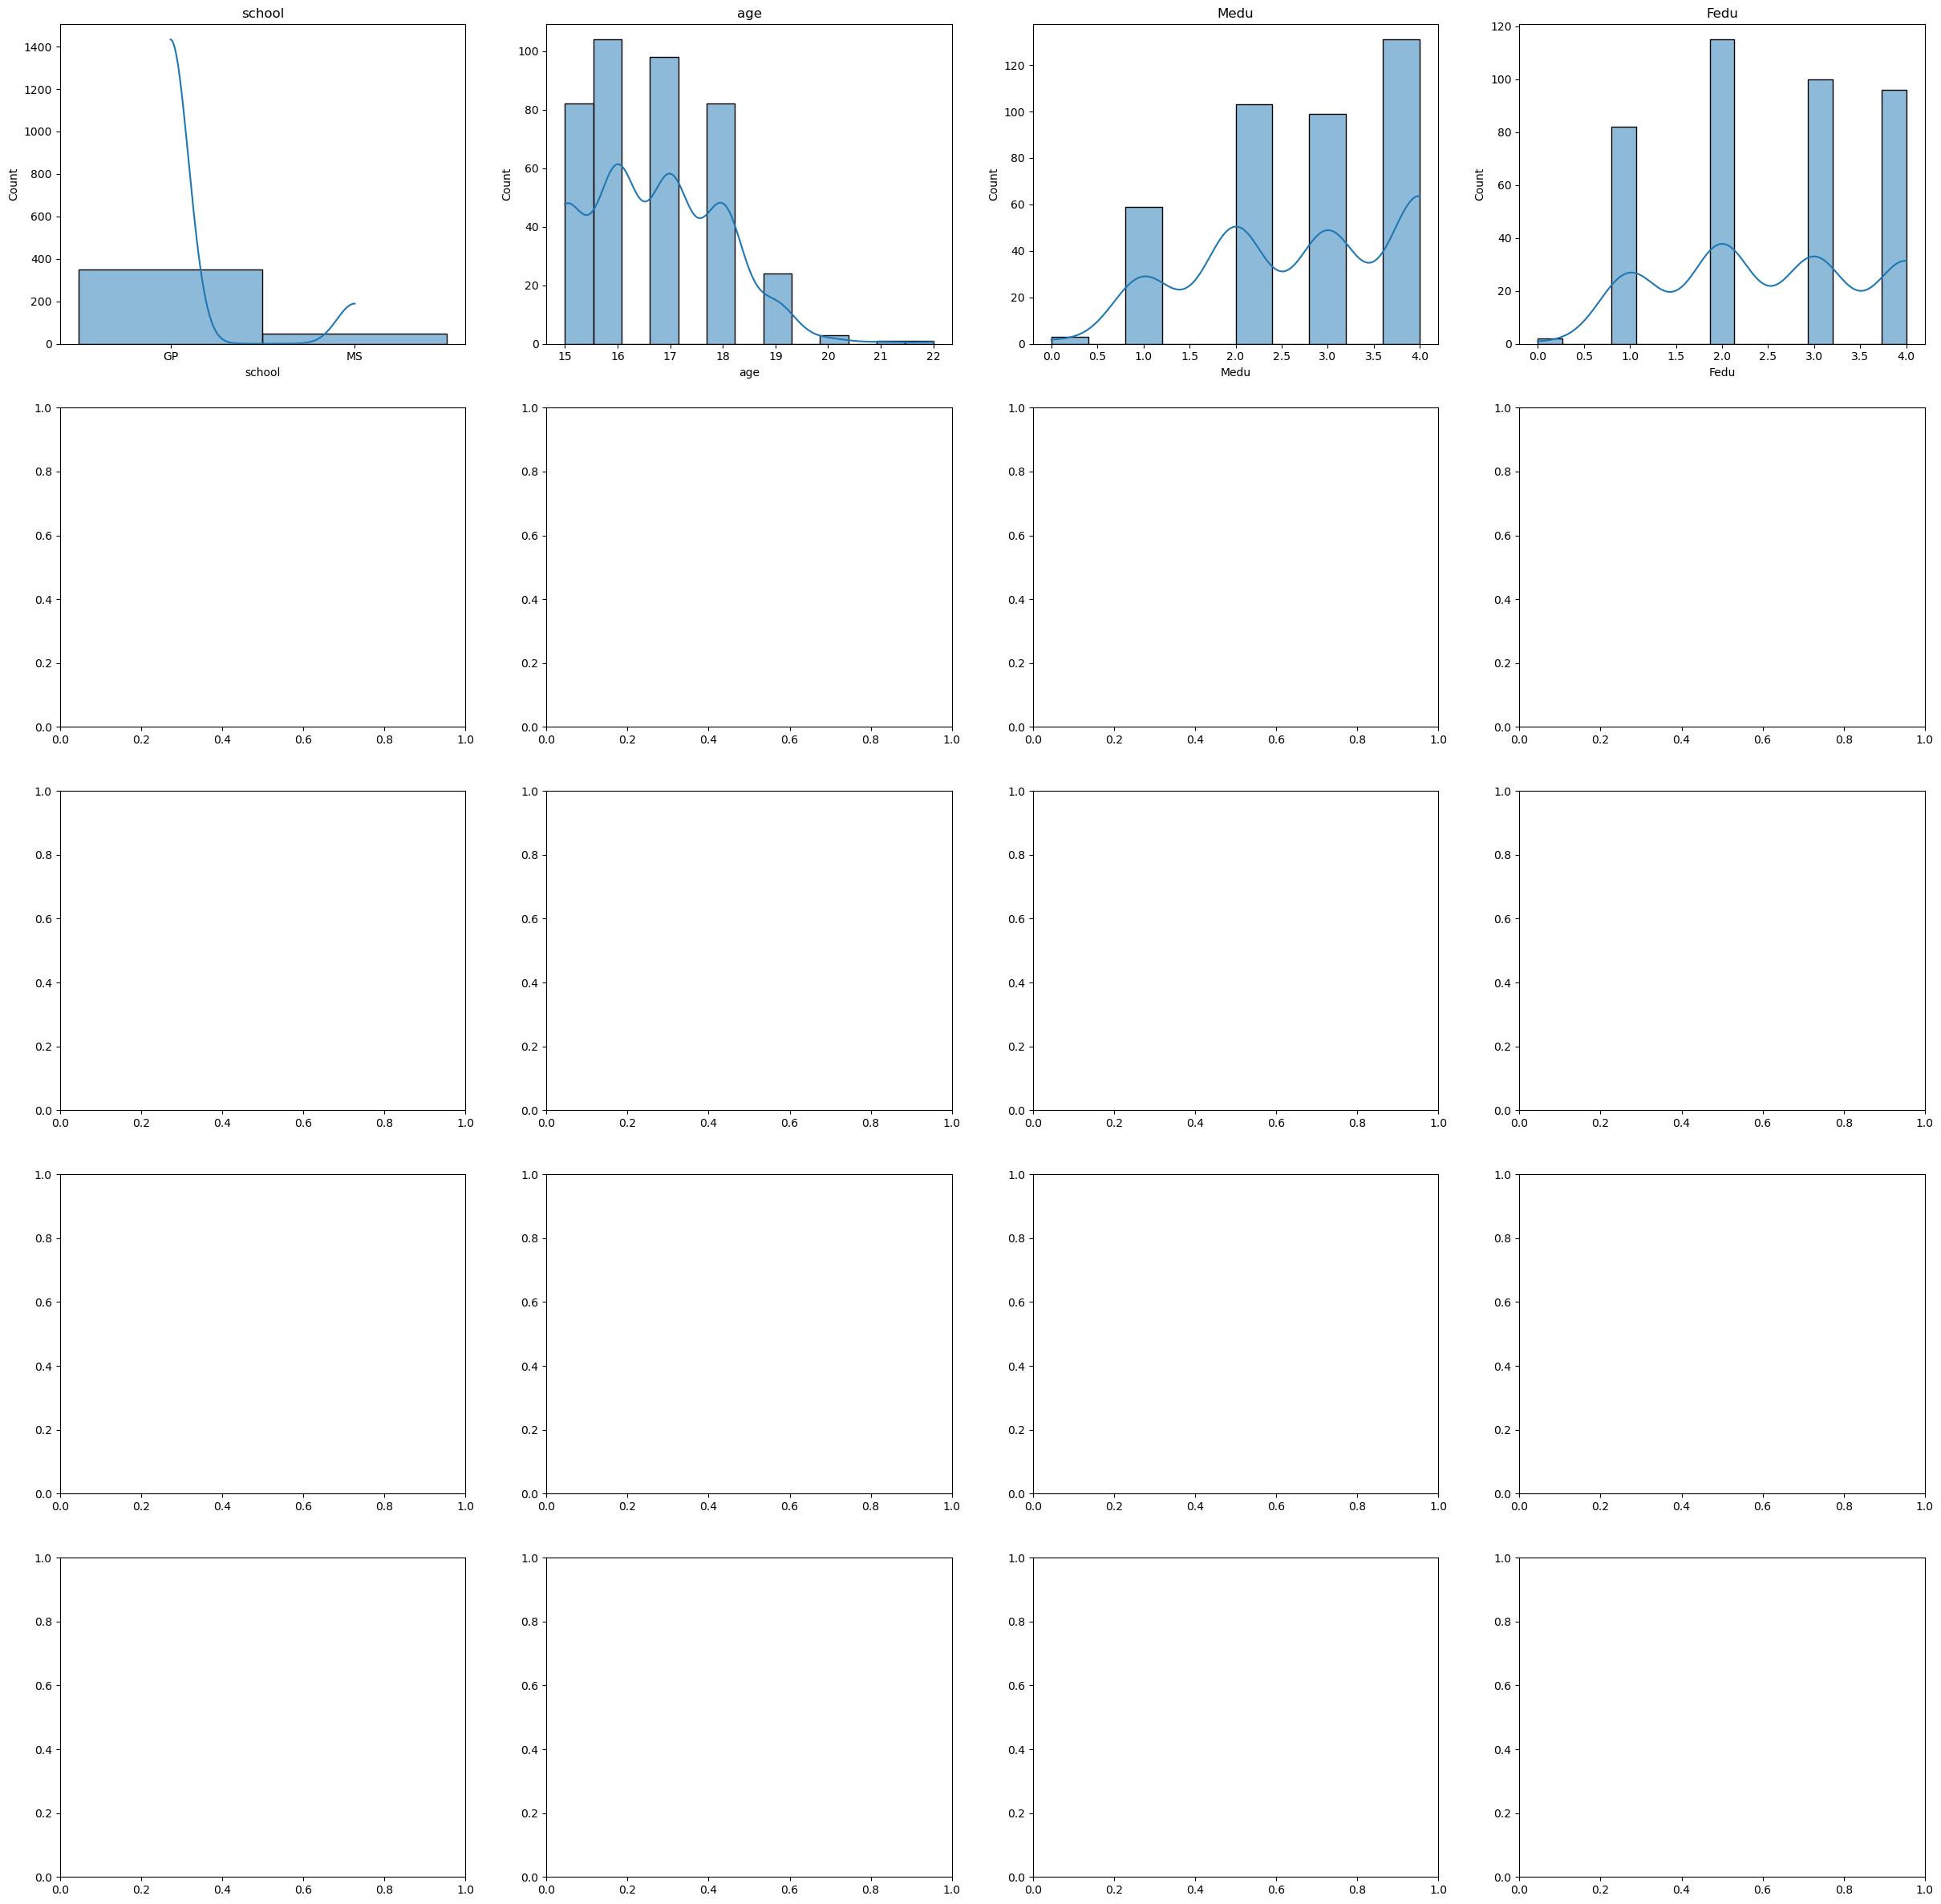

In [47]:
#Check factors to delete
df = data_crop
fig, axes = plt.subplots(5, len(df.columns)//5, figsize=(30, 30))

# Цикл для построения графиков
for i, column in enumerate(df.columns):
    sns.histplot(data=df[column], ax=axes[i//5, i%5], kde=True)
    axes[i//5, i%5].set_title(column)

# Настройка отображения
plt.tight_layout()

# Отображение графиков
plt.show()
print(data_crop)

In [28]:
# normalized, optimized factors
X = data_crop
scaler = MaxAbsScaler()
scaler.fit(X)
scaled = scaler.transform(X)
scaled_X = pd.DataFrame(scaled, columns=df.columns)

print(scaled_X)

     school  gender       age  address  famsize  Pstatus  Medu  Fedu  Mjob  \
0       0.0     0.0  0.818182      1.0      1.0      0.0  1.00  1.00  0.75   
1       0.0     0.0  0.772727      1.0      1.0      1.0  0.25  0.25  0.75   
2       0.0     0.0  0.681818      1.0      0.0      1.0  0.25  0.25  0.75   
3       0.0     0.0  0.681818      1.0      1.0      1.0  1.00  0.50  0.50   
4       0.0     0.0  0.727273      1.0      1.0      1.0  0.75  0.75  0.00   
..      ...     ...       ...      ...      ...      ...   ...   ...   ...   
390     1.0     1.0  0.909091      1.0      0.0      0.0  0.50  0.50  0.25   
391     1.0     1.0  0.772727      1.0      0.0      1.0  0.75  0.25  0.25   
392     1.0     1.0  0.954545      0.0      1.0      1.0  0.25  0.25  0.00   
393     1.0     1.0  0.818182      0.0      0.0      1.0  0.75  0.50  0.25   
394     1.0     1.0  0.863636      1.0      0.0      1.0  0.25  0.25  0.00   

     Fjob  ...  higher  internet  romantic  famrel  freetime  g

In [ ]:
# normalized, optimized factors, k-fold

In [ ]:
# normalized, optimized factors, bustrup